In [1]:
library(tidyverse)
# library(cowplot)
# library(Ternary)
library(RcppCNPy)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
rgba.percent.mv = t(npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/rgba_mv_grp_per.npy'))
mv.theta = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_mv.npy')
mv.color = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/color_mv_grp_per.npy')
mv.magni = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv.npy')

df.tern.mv = data.frame(rgba.percent.mv)
colnames(df.tern.mv) = c('Visaul', 'Somatosensory', 'Auditory')
df.tern.mv$color = rgb(mv.color)
df.tern.mv$magni = mv.magni
df.tern.mv$theta = mv.theta

head(df.tern.mv)

,Visaul,Somatosensory,Auditory,color,magni,theta
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0.47772337,0.45636272,0.06591391,#DBCD00,0.2788877,0.9776731
2,0.04224885,0.93936725,0.01838391,#08DB00,0.8190907,2.0580176
3,0.10051763,0.42528825,0.47419412,#00CEDB,0.6495430,3.2059874
4,0.21799935,0.38511570,0.39688495,#00ACDB,0.1753379,3.3685823
5,0.85939612,0.06319886,0.07740503,#DB0003,0.9808285,6.2700093
6,0.28374175,0.63025807,0.08600019,#8CDB00,0.1079935,1.4277650


In [4]:
max(mv.magni)

[1] 1

In [3]:
library(ggtern)

Registered S3 methods overwritten by 'ggtern':
  method           from   
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

--
Remember to cite, run citation(package = 'ggtern') for further info.
--


Attaching package: 'ggtern'


The following objects are masked from 'package:ggplot2':

    aes, annotate, ggplot, ggplotGrob, ggplot_build, ggplot_gtable,
    ggsave, layer_data, theme_bw, theme_classic, theme_dark,
    theme_gray, theme_light, theme_linedraw, theme_minimal, theme_void




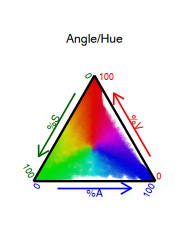

In [4]:
options(repr.plot.width = 40/25.4, repr.plot.height = 50/25.4)


t2 = ggtern(data = df.tern.mv, aes(x = Somatosensory, y = Visaul, z = Auditory)) +
        ggrastr::geom_point_rast(color = df.tern.mv$color, alpha = 0.1, size = 0.5) + 
        scale_T_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c(' 0', ' 100')) +
        scale_L_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c('0 ', '100 ')) +
        scale_R_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c('0 ', '100 ')) +
        theme_arrowcustomlength(.2,.8) +
        theme_notitles() +
        # custom_percent("%") +
        labs(title = 'Angle/Hue', T='%V', L='%S', R='%A') +
        theme(tern.axis.line.L = element_line(colour = 'black'),
                tern.axis.line.T = element_line(colour = 'black'),
                tern.axis.line.R = element_line(colour = 'black'),
                tern.axis.arrow.sep = .06,
                tern.axis.arrow.text.T = element_text(color ='red', size=6),
                tern.axis.arrow.T = element_line(color ='red'),
                tern.axis.text.T = element_text(color = 'red', size=5),
                tern.axis.arrow.text.L = element_text(color ='darkgreen', size=6),
                tern.axis.arrow.L = element_line(color ='darkgreen'),
                tern.axis.text.L = element_text(color = 'darkgreen', size=5),
                tern.axis.arrow.text.R = element_text(color ='blue', size=6),
                tern.axis.arrow.R = element_line(color ='blue'),
                tern.axis.text.R = element_text(color = 'blue', size=5),
                tern.panel.background = element_rect(fill='white'),
                plot.title = element_text(hjust=0.5, size=7)
                ) 
    
print(t2)

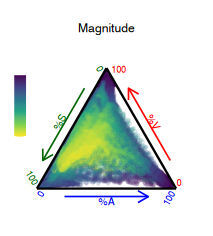

In [5]:
options(repr.plot.width = 45/25.4, repr.plot.height = 50/25.4)
# options(repr.plot.width = 5, repr.plot.height = 5)


t1 = ggtern(data = df.tern.mv, aes(x = Somatosensory, y = Visaul, z = Auditory)) +
        ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, aes(color=magni)) + 
        scale_color_continuous(type='viridis', direction=-1, breaks = c(0), labels = c('')) +
        scale_T_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c(' 0', ' 100')) +
        scale_L_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c('0 ', '100 ')) +
        scale_R_continuous(limits = c(0, 1), breaks = c(0.05, 0.99), labels = c('0 ', '100 ')) +
        theme_arrowcustomlength(.2,.8) +
        theme_notitles() +
        # custom_percent("%") +
        labs(title = 'Magnitude', T='%V', L='%S', R='%A', color = 'Magnitude') +
        theme(tern.axis.line.L = element_line(colour = 'black'),
                tern.axis.line.T = element_line(colour = 'black'),
                tern.axis.line.R = element_line(colour = 'black'),
                tern.axis.arrow.sep = .06,
                tern.axis.arrow.text.T = element_text(color ='red', size=6),
                tern.axis.arrow.T = element_line(color ='red'),
                tern.axis.text.T = element_text(color = 'red', size=5),
                tern.axis.arrow.text.L = element_text(color ='darkgreen', size=6),
                tern.axis.arrow.L = element_line(color ='darkgreen'),
                tern.axis.text.L = element_text(color = 'darkgreen', size=5),
                tern.axis.arrow.text.R = element_text(color ='blue', size=6),
                tern.axis.arrow.R = element_line(color ='blue'),
                tern.axis.text.R = element_text(color = 'blue', size=5),
                tern.panel.background = element_rect(fill='white'),
                plot.title = element_text(hjust=0.5, size=7),
                # legend.position='none'
                legend.title = element_blank(),
                legend.key.width=unit(.25,'cm'),
                legend.key.height=unit(.26,'cm'),
                legend.position = c(0.08, 0.66)
                )

print(t1)

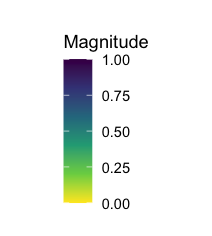

In [340]:
cowplot::ggdraw(t1.leg)

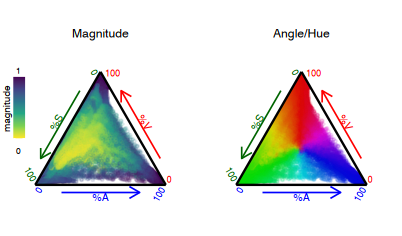

In [6]:
options(repr.plot.width = 85/25.4, repr.plot.height = 50/25.4)
ter = cowplot::plot_grid(ggplotGrob(t1), ggplotGrob(t2), nrow=1, rel_widths=c(1,1)) +
        annotate('text', x = 0.046, y=0.70, label='1', size=1.7) +
        annotate('text', x = 0.046, y=0.36, label='0', size=1.7) +
        annotate('text', x = 0.016, y=0.54, label='magnitude', size=2, angle=90)

ggrastr::rasterize(ter, layer='points', dpi=600)
# cowplot::ggdraw(ter)

In [499]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_02_try.pdf', width = 8,height = 5,units =  "cm", dpi = 600, plot=ter)

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"


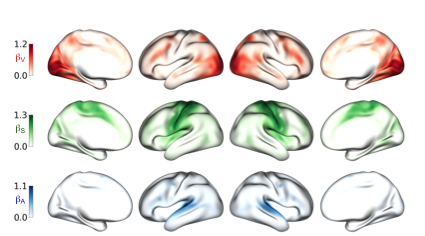

In [474]:
img.beta.v = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/beta_v.png'
img.beta.s = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/beta_s.png'
img.beta.a = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/beta_a.png'

options(repr.plot.width = 90/25.4, repr.plot.height = 50/25.4)

f03.beta.base = cowplot::plot_grid(NULL, nrow = 1) 
f03.beta = cowplot::ggdraw(f03.beta.base) +
            cowplot::draw_image(img.beta.v, x = -0.12, y = 0.45, scale=1.2,  halign=0, valign=0) +
            cowplot::draw_image(img.beta.s, x = -0.12, y = 0.15, scale=1.2,  halign=0, valign=0) +
            cowplot::draw_image(img.beta.a, x = -0.12, y = -0.15, scale=1.2,  halign=0, valign=0)+
            annotate('text', x = 0.048, y = 0.755, label=expression(beta[V]), color='red', size=2) +
            annotate('text', x = 0.048, y = 0.455, label=expression(beta[S]), color='darkgreen', size=2) +
            annotate('text', x = 0.048, y = 0.155, label=expression(beta[A]), color='blue', size=2)  

cowplot::ggdraw(f03.beta)

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"


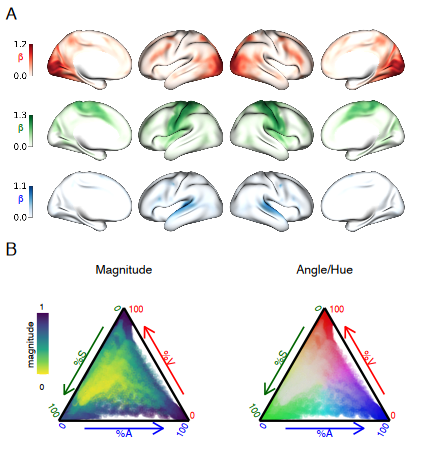

In [500]:
options(repr.plot.width = 90/25.4, repr.plot.height = 100/25.4)

f03.left.base = cowplot::plot_grid(NULL, ter, ncol=2, rel_widths=c(1,17))
f03.left = cowplot::plot_grid(f03.beta, f03.left.base, nrow=2, rel_heights=c(1,1), labels=c('A','B'), 
                                label_size = 10, label_fontface='plain') 

cowplot::ggdraw(f03.left)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


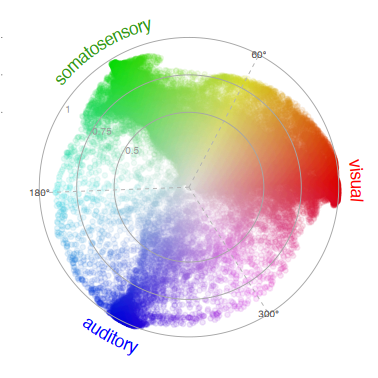

In [505]:
options(repr.plot.width = 80/25.4, repr.plot.height = 80/25.4)

library(geomtextpath)
sz.circ.label = 2
sz.circ.curve = 10
line.size = 0.2

circ.mv <- ggplot(df.tern.mv, aes(x = theta * 360 / (2 * pi), y = magni))+
                ggrastr::geom_point_rast(alpha = 0.1, size = 1, color = rgb(mv.color)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = line.size) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("visual", "somatosensory", "auditory")) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
                #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
                coord_curvedpolar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                    axis.ticks = element_line(linewidth = line.size),
                    axis.text.x = element_text(size = sz.circ.curve, color = c("red", "#309617", "blue")),
                    panel.grid = element_blank(),
                    text = element_text(family='Helvetica'))

print(circ.mv)

In [298]:
img.sf.mv.lat.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_lateral_L.png'
img.sf.mv.lat.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_lateral_R.png'
img.sf.mv.med.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_medial_L.png'
img.sf.mv.med.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_medial_R.png'

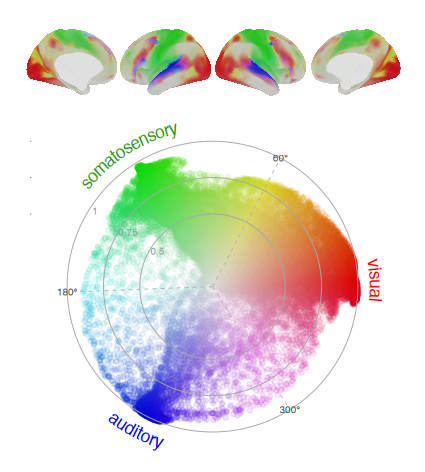

In [506]:
options(repr.plot.width = 90/25.4, repr.plot.height = 100/25.4)

scl=0.3
f03.right.base = cowplot::plot_grid(NULL, circ.mv, nrow=2, rel_heights=c(1,3.5))
f03.right = cowplot::ggdraw(f03.right.base) +
                cowplot::draw_image(img.sf.mv.lat.l, x = 0.230, y = 0.73, scale = scl, halign=0, valign=0) +
                cowplot::draw_image(img.sf.mv.lat.r, x = 0.464, y = 0.73, scale = scl, halign=0, valign=0) +
                cowplot::draw_image(img.sf.mv.med.l, x = 0.021, y = 0.73, scale = scl, halign=0, valign=0) +
                cowplot::draw_image(img.sf.mv.med.r, x = 0.679, y = 0.73, scale = scl, halign=0, valign=0) 

cowplot::ggdraw(f03.right)

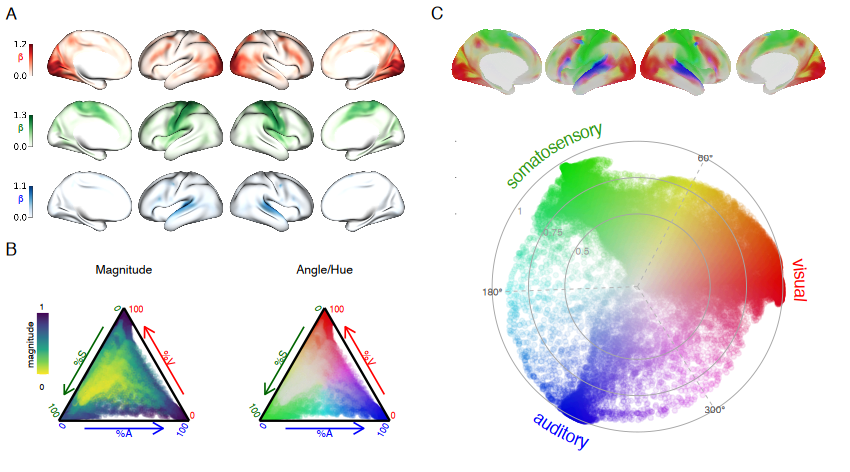

In [507]:
options(repr.plot.width = 180/25.4, repr.plot.height = 100/25.4)

f03.final = cowplot::plot_grid(f03.left, f03.right, nrow=1, rel_widths=c(1,1), labels=c('','C'), 
                                label_size = 10, label_fontface='plain') +
                                theme(text = element_text(family='Helvetica', size=5)) 
                                # annotate('segment', x=0, xend=1, y=0.94, yend=0.94, color='red') +
                                # annotate('segment', x=0.75, xend=0.75, y=0., yend=1, color='red') 
                      
cowplot::ggdraw(f03.final)

In [504]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_02_v6.pdf', width = 19,height = 10,units =  "cm", dpi = 600, plot=f03.final)

In [486]:
ragg::agg_png("/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/f_02_v6.png", 
           width = 19, height = 10, res = 600, units = 'cm', background = 'white')
print(f03.final)
invisible(dev.off())